In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
def climo_plot(r,t,title):
    width = .5 
    m1_t = pd.DataFrame({
     'Rainfall (mm)' : r,
     'Temperature' : t})

    m1_t[['Rainfall (mm)']].plot(kind='bar', width = width,color='black')
    m1_t['Temperature'].plot(secondary_y=True,color='red',linestyle="dashed",marker="o")

    ax = plt.gca()
    plt.xlim([-width, 12-width])
    ax.set_xticklabels(('J','F','M','A','M','J','J','A','S','O','N','D'))
    plt.ylabel("Temperature(C°)")
    
    plt.title(title)
    plt.savefig(title,bbox_inches="tight",dpi=800)
    plt.show()

In [3]:
def load(fname):
    l_new=[]
    with open(fname, encoding="utf-8-sig") as filex:
        reader = csv.reader(filex)
        for row in reader:
            l_new=row 
    filex.close()
    for i in range(0,365):
        l_new[i]=float(l_new[i])
    return l_new

In [4]:
def add(l,r,x):
    s=0
    for i in range(l,r):
        s+=x[i]
    return s

In [5]:
def averagise(x):
    l_new=[add(0,31,x)/31,add(31,59,x)/28,add(59,90,x)/31,add(90,120,x)/30,add(120,151,x)/31,add(151,181,x)/30,add(181,212,x)/31,add(212,243,x)/31,add(243,273,x)/30,add(273,304,x)/31,add(304,334,x)/30,add(334,365,x)/31]
    return l_new

In [6]:
def load_and_average(fname):
    l_new=load(fname)
    avg_new=averagise(l_new)
    return avg_new

In [7]:
avg_rain=load_and_average('rainfall.csv')
avg_tmax=load_and_average('tmax.csv')
avg_tmin=load_and_average('tmin.csv')

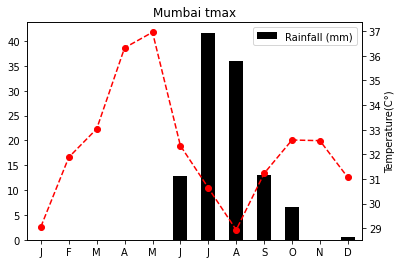

In [ ]:
climo_plot(avg_rain,avg_tmax,"Mumbai tmax")
climo_plot(avg_rain,avg_tmin,"Mumbai tmin")